# Support Vector Machine (SVM) Implementation

The "Support Vector Machine (SVM) Implementation" module involves using the Support Vector Machine algorithm from the sci-kit learn library. SVM is a powerful supervised machine learning model used for classification and regression tasks. This module outlines a structured approach to building an SVM model, following four essential phases common in machine learning projects.

**Phase 1: Data Cleaning/Analysis**

This phase involves data preprocessing, exploratory data analysis (EDA), and understanding the dataset. Cleaning the data ensures it's in a suitable format for modeling. Analysis helps in understanding relationships, distributions, and key features within the data.

**Phase 2: Train the model**

Using the cleaned and preprocessed data, the SVM model is trained on a portion of this data, known as the training set. During training, the model learns patterns and relationships between input features and target labels.

**Phase 3: Test the model**

After training, the model's performance is evaluated using a separate set of data called the testing set. This step helps assess how well the model generalizes to unseen data and measures its predictive ability.

**Phase 4: Compare the results**

In this phase, the performance metrics of the model on the test set are analyzed and compared. Metrics like accuracy, precision, recall, or F1-score might be used to evaluate the model's effectiveness. This step helps in choosing the best-performing model or fine-tuning the existing one for better results.

## Phase 1: Data Cleaning/Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# Load the diabetes dataset
data_df = pd.read_csv('/content/sample_data/diabetes.csv')

# Display the first few rows of the dataset
data_df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


The displayed snippet represents our original dataset in a pandas dataframe format. However, this data isn't structured optimally for machine learning purposes. Our objective is to transform it into a suitable format for model training. Initially, we'll encode categorical features, such as positive/negative or male/female, with 0s and 1s. Additionally, we'll standardize the 'age' attribute to ensure its values align consistently with other features. Leveraging scikit-learn's 'StandardScaler' function simplifies this standardization process. Lastly, we'll append a column of ones to serve as the model's bias term.

In [3]:
# Replace string values with numerical representations
data_df = data_df.replace(['Male', 'Yes', 'Positive'], 1)
data_df = data_df.replace(['Female', 'No', 'Negative'], 0)

# Display the updated DataFrame
data_df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
# Standardize the 'Age' column using StandardScaler
scaler = StandardScaler()
data_df[['Age']] = scaler.fit_transform(data_df[['Age']])

# Display the updated DataFrame after standardization
data_df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Above is the results of our cleaning. The data is now useful, the bias is now a part of our features, and the age feature is normalized.

Next, we need to shuffle and split the data, train and test our model, then view the metrics. Using sci-kit learn, this process becomes incredible simple. The scikit-learn website provides a model, a data shuffle and split method, and convenient methods to display the confusion matrix and f score.

In [5]:
# Splitting the data into training and testing sets
# Here, we're using 90% of the data for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(
    data_df.iloc[:, :-1],  # Features (all columns except the last one)
    data_df.iloc[:, -1],   # Target column (the last column)
    test_size=int(data_df.shape[0] * 0.1),  # Test set size (10% of data)
    train_size=int(data_df.shape[0] * 0.9),  # Train set size (90% of data)
    random_state=1  # Setting the random state for reproducibility
)

# Display the shape of the training and testing sets
print(X_train.shape)  # Shape of the training features
print(X_test.shape)   # Shape of the testing features


(468, 16)
(52, 16)


## Phase 2&3: Train and Test the Model

In this phase, the focus is on data preparation for training and model training itself. Utilizing sci-kit learn's Support Vector Machine Classifier module, we'll create an SVM model. The svm.SVC() classification module provides various parameters to fine-tune the model. Of particular interest in this analysis is the 'kernel' parameter. We'll experiment with different kernel types to assess their impact on the dataset and determine the most suitable choice. Other parameters, either beyond the scope of this notebook or insignificantly affecting model quality, will not be explored extensively.

In [6]:
# List of different kernel types to be evaluated
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop through each kernel type and evaluate the SVM classifier
for kernel in kernels:
    # Initialize an SVM classifier with the specific kernel type
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Output the accuracy score for the current kernel type
    print(f"{kernel.capitalize()} Kernel Accuracy Score: {np.round(clf.score(X_test, y_test), 2)}")


Linear Kernel Accuracy Score: 0.88
Poly Kernel Accuracy Score: 0.9
Rbf Kernel Accuracy Score: 0.92
Sigmoid Kernel Accuracy Score: 0.67


The rbf and poly kernels exhibited the highest accuracy scores among the tested options. For this analysis, we'll proceed by utilizing the default rbf kernel.

F1 score: 0.93


<Figure size 5000x5000 with 0 Axes>

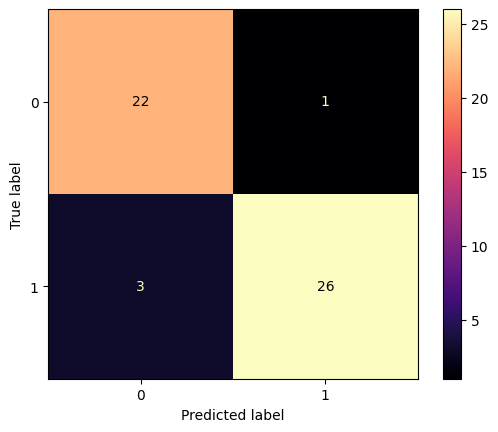

In [7]:
# Create a Support Vector Machine (SVM) Classifier instance
clf = svm.SVC()

# Fit the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_hat = clf.predict(X_test)

# Calculate and display the F1 score
print("F1 score:", np.round(f1_score(y_test, y_hat), 2))

# Display the Confusion Matrix
plt.figure(figsize=(50, 50))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='magma')


Our model showcased strong performance, misclassifying only 4 out of the total 52 feature vectors in our dataset. Although it didn't achieve the same level of accuracy as the MLP model, the SVM presents a simpler and more understandable approach. It functions by delineating clear boundaries to make determinations, akin to decision trees, offering a straightforward explanation of its predictions without intricate equations, making it more user-friendly for the intended audience.

# Phase 4: Model Evaluation and Comparison

The classification scores for various models are as follows:

Perceptron: 0.94
MLP: 1 (Tanh, ReLU)
Logistic Regression: 0.95
Decision Tree: 0.99
KNN: 0.97
SVM: 0.93

The MLP stands out as the top-performing model with a flawless F-score of 1 and no misclassified instances. Conversely, the decision tree, despite its technically slightly lower F-score of 0.99 and a single misclassification, offers high accuracy and exceptional intuitiveness. This distinction raises a critical point in model selection, emphasizing the context of application and the end-user. For instance, in a medical context, a doctor might prioritize comprehending the decision-making process for a patient. Even if a tool demonstrates high accuracy, one's own judgment and understanding are significant, especially when critical decisions impact lives. Balancing the interpretability and accuracy of a model becomes crucial, and its implications on the end-user must be carefully considered and aligned with their needs and expectations.